___
# Ciência dos Dados - PROJETO 1

## Gustavo Schlieper e Giovanni Pertence
___

## Perfil dos brasileiros economicamente ativos

___
## Introdução

Neste Projeto criaremos os perfis de brasileiros economicamente ativos em 2011 e 2015. Para isso utilizaremos as seguintes variáveis:

    -Sexo(V0302);
    -Idade do morador na data de referência(V8005);
    -Condição de atividade na semana de referência para pessoas de 10 anos ou mais de idade(V4704);
    -Grupamentos de atividade principal do empreendimento do trabalho principal da semana de referência para pessoas de 10 anos ou mais de idade(V4809);
    -Horas habitualmente trabalhadas por semana em todos os trabalhos da semana de referência para pessoas de 10 anos ou mais de idade(V4707);
    -Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade(V4718);
    -Tipo de família para todas as unidades domiciliares (em todos os tipos de família podem existir pessoas cuja condição na família era outro parente, agregado, pensionista, empregado doméstico ou parente do empregado doméstico)(V4723);
    -Nível de instrução mais elevado alcançado (todas as pessoas)(V4745).

___
## Filtros da base de dados

Impede a criaçào de uma segunda barra deslisante vertical

In [61]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [62]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import math
import os

In [63]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\gugat\Desktop\Insper DS 2018.1\2.1 semestre\Dados\CD_19.1\Projeto 1


# 2015

In [64]:
#Leitura dos dados de 2015
dados = pd.read_csv('PES2015.csv',sep=',')

#Filtrando variáveis
Dados_Filtrado = dados.loc[(dados.V0302)|(dados.V8005)|(dados.V4704)|(dados.V4809)|(dados.V4707)|(dados.V4718)|(dados.V4723)|\
                           (dados.V4745) , ['V0302','V8005','V4704','V4809','V4707','V4718','V4723','V4745']]

#Trocando o nome das colunas
Dados_Filtrado.rename(columns={'V0302':'Sexo','V8005':'Idade','V4704':'Condição de atividade',\
                               'V4809':'Atividade principal','V4707':'Horas habitualmente trabalhadas por semana',\
                             'V4718':'Rendimento mensal','V4723':'Tipo de família','V4745':'Nível de instrução' },inplace=True)

#Definindo as variáveis como categóricas
Dados_Filtrado.Sexo = Dados_Filtrado.Sexo.astype('category')
Dados_Filtrado.Idade = Dados_Filtrado.Idade.astype('float')
Dados_Filtrado['Condição de atividade'] = Dados_Filtrado['Condição de atividade'].astype('category')
Dados_Filtrado['Atividade principal'] = Dados_Filtrado['Atividade principal'].astype('category')
Dados_Filtrado['Horas habitualmente trabalhadas por semana'] = Dados_Filtrado['Horas habitualmente trabalhadas por semana']\
.astype('category')
Dados_Filtrado['Tipo de família'] = Dados_Filtrado['Tipo de família'].astype('category')
Dados_Filtrado['Nível de instrução'] = Dados_Filtrado['Nível de instrução'].astype('category')
Dados_Filtrado['Rendimento mensal'] = Dados_Filtrado['Rendimento mensal'].astype('float')


In [65]:
#Traduzindo os tipos pelas descrições
Dados_Filtrado.Sexo.cat.categories = (['M','F'])
Dados_Filtrado['Condição de atividade'].cat.categories = (['Economicamente ativas','Não economicamente ativas'])
Dados_Filtrado['Atividade principal'].cat.categories = (['Agrícola','Outras atividades industriais','Indústria de transformação\
','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública\
','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades\
','Atividades maldefinidas '])
Dados_Filtrado['Horas habitualmente trabalhadas por semana'].cat.categories = (['Até 14 horas','15 a 39 horas','40 a 44 horas'\
,'45 a 48 horas','49 horas ou mais'])
Dados_Filtrado['Tipo de família'].cat.categories = (['Casal sem filhos','Casal com todos os filhos menores de 14 anos',\
'Casal com todos os filhos de 14 anos ou mais','Casal com filhos menores de 14 anos e de 14 anos ou mais','Mãe com todos os \
filhos menores de 14 anos','Mãe com todos os filhos de 14 anos ou mais','Mãe com filhos menores de 14 anos e de 14 anos ou mais\
','Outros tipos de família'])
Dados_Filtrado['Nível de instrução'].cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental \
completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente'\
,'Superior completo ','Não determinado'])

#Remove PEA que não declarou renda, pois para esses o valor computado é 999 999 999 999.
Dados_Filtrado["Rendimento mensal"] = Dados_Filtrado["Rendimento mensal"][(Dados_Filtrado["Rendimento mensal"])<999999999999]

#Elimina os não economicamente ativos.
PEA = Dados_Filtrado[Dados_Filtrado['Condição de atividade'] =='Economicamente ativas']

#Como foi filtrada a condição de atividade a retiramos do DataFrame para evitar a poluição visual
PEA = PEA.drop(columns = 'Condição de atividade')

PEA.head(5)

,Sexo,Idade,Atividade principal,Horas habitualmente trabalhadas por semana,Rendimento mensal,Tipo de família,Nível de instrução
0,M,23.0,"Outros serviços coletivos, sociais e pessoais",40 a 44 horas,800.0,Outros tipos de família,Médio completo ou equivalente
1,F,23.0,Outras atividades,40 a 44 horas,1150.0,Outros tipos de família,Médio completo ou equivalente
2,F,35.0,Administração pública,40 a 44 horas,880.0,Casal com todos os filhos menores de 14 anos,Superior incompleto ou equivalente
3,M,34.0,Comércio e reparação,49 horas ou mais,3000.0,Casal com todos os filhos menores de 14 anos,Superior completo
7,F,18.0,Comércio e reparação,40 a 44 horas,880.0,Casal com todos os filhos menores de 14 anos,Médio completo ou equivalente


___
## Análise e Resultados

### Idade

Descrição da Idade
__________________________________________________
count    183089.000000
mean         38.272485
std          13.755427
min          10.000000
25%          27.000000
50%          37.000000
75%          48.000000
max          99.000000
Name: Idade, dtype: float64
__________________________________________________
Moda:  35.0
__________________________________________________


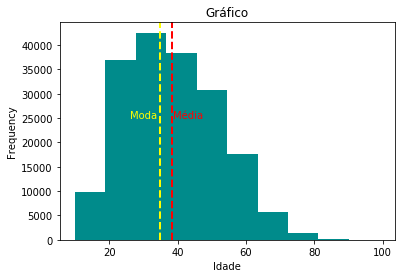

In [66]:
print("Descrição da Idade")
print(50*"_")
print(PEA.Idade.describe())
plot_idade = PEA.Idade.plot.hist(color = 'darkcyan')

moda_id = PEA.Idade.mode()

def verticalLine(plot, x, y, color, nome, eixox, titulo, x2, nome2):
    plot.axvline(x, color=color, linestyle="dashed", linewidth=2)
    plot.text(1.01*x, y, nome, color=color)
    plt.xlabel(eixox)
    plt.title(titulo)
    plot.axvline(x2, color="yellow", linestyle="dashed", linewidth=2)
    plot.text(0.75*x2, y, nome2, color="yellow")
    

verticalLine(plot_idade, PEA.Idade.mean(), 25000, "r", "Média", "Idade", "Gráfico", moda_id[0], "Moda")




print(50*"_")
print("Moda: ",moda_id[0])
print(50*"_")

A moda da idade foi escolhida para representar o perfil do trabalhador(a) brasileiro(a), uma vez que ela é proxima da média.

### Nível de instrução

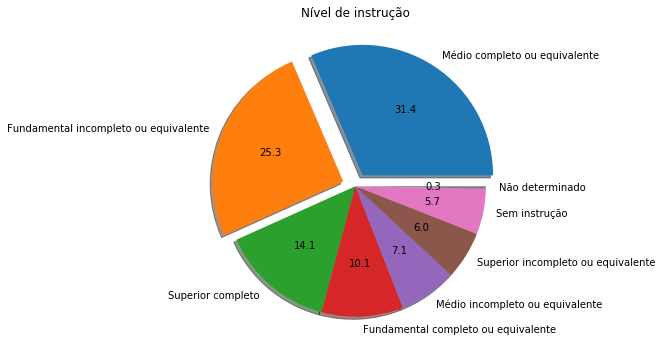

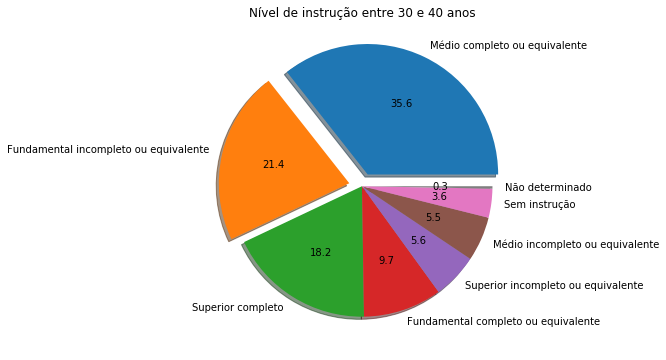

In [67]:
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0)

graf1 = (PEA['Nível de instrução'].value_counts()).plot(kind='pie',title='Nível de instrução',autopct='%.1f',figsize=(13, 6),\
explode=explode, shadow=True)
plt.ylabel("")
plt.show()


graf2 = (PEA['Nível de instrução'][(PEA.Idade <= 40) & (PEA.Idade >= 30)].value_counts())\
    .plot(kind='pie',title='Nível de instrução entre 30 e 40 anos',autopct='%.1f',figsize=(13, 6), explode=explode, shadow=True)
plt.ylabel("")
plt.show()

A divisão dos setores do nível de intrução da PEA na faixa de 30 à 40 anos representa a educação do brasileiro economicamente ativo. Dado isso podemos dizer que escolher os dois maiores grupos para realisar a análise é a escolha ideal.

### Horas de trabalho por semana

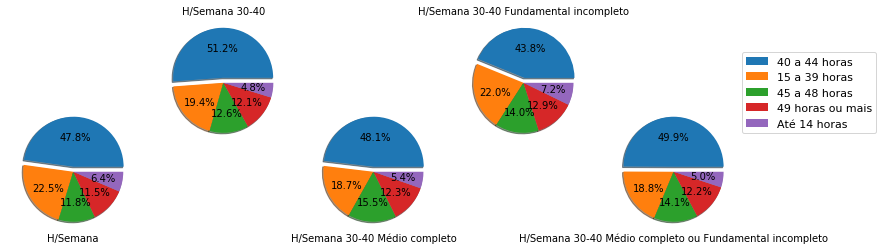

_______________________________________________________________________________________________________________________________


In [68]:
legenda = ['40 a 44 horas','15 a 39 horas','45 a 48 horas','49 horas ou mais','Até 14 horas']
explode = (0.1, 0, 0, 0, 0)

plt.subplot(151)
graf3 = (PEA['Horas habitualmente trabalhadas por semana'].value_counts()).plot(kind='pie',\
autopct='%.1f%%',figsize=(13, 6), labels=None, explode = explode, shadow = True)
plt.title('H/Semana',y=-0.1, size = 10)
plt.ylabel("")


plt.subplot(252)
graf4 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30)].value_counts())\
.plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, explode = explode, shadow = True)
plt.title('H/Semana 30-40', size = 10)
plt.ylabel("")


plt.subplot(153)
graf5 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30) & (PEA['Nível de instrução']\
== 'Médio incompleto ou equivalente')].value_counts()).plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, explode\
= explode, shadow = True)
plt.title('H/Semana 30-40 Médio completo',y=-0.1, size = 10)
plt.ylabel("")


plt.subplot(254)
graf6 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30) & ((PEA['Nível de instrução']\
== 'Fundamental incompleto ou equivalente'))].value_counts()).plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, \
explode = explode, shadow = True)
plt.title('H/Semana 30-40 Fundamental incompleto', size = 10)
plt.ylabel("")

plt.subplot(155)
graf6 = (PEA['Horas habitualmente trabalhadas por semana'][(PEA.Idade <= 40) & (PEA.Idade >= 30) & ((PEA['Nível de instrução']\
== 'Fundamental incompleto ou equivalente') | (PEA['Nível de instrução'] == 'Médio completo ou equivalente'))]\
.value_counts()).plot(kind='pie',autopct='%.1f%%',figsize=(13, 6), labels=None, explode = explode, shadow = True)
plt.title('H/Semana 30-40 Médio completo ou Fundamental incompleto',y=-0.1, size = 10)
plt.ylabel("")
plt.legend(legenda, loc='best', fontsize= 11, bbox_to_anchor=(1,1.5))
plt.show()
print(127*'_')

Entre todas os casos analisadas percebemos que trabalhar de 40 a 44 horas por semana é o mais recorente, por isso essa faixa foi escolhida para representar o perfil da PEA brasileira.

### Renda

Grupo escolhido
__________________________________________________
Média: 1350


Todos
__________________________________________________
Média: 1669


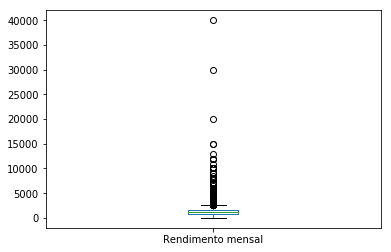

In [69]:
PEA1 = PEA[(PEA.Idade <= 40) & (PEA.Idade >= 30) & (PEA['Horas habitualmente trabalhadas por semana'] == '40 a 44 horas') & \
((PEA['Nível de instrução'] == 'Fundamental incompleto ou equivalente') | (PEA['Nível de instrução'] == \
'Médio completo ou equivalente'))]

print('Grupo escolhido')
print(50*"_")
print('Média: ' + str(int(PEA1['Rendimento mensal'].describe()[1])))
print('\n')
print('Todos')
print(50*"_")
print('Média: ' + str(int(PEA['Rendimento mensal'].describe()[1])))
PEA1['Rendimento mensal'].plot.box();

Ao plotar o boxplot é possivel ver que existem muitos pontos fora da curva, que podem estar deslocando a média para um valor maior. Para saciar essa dúvida foi criado o histagrama e a distribuição normal da renda.

                               Histograma e distribuiçao normal da renda


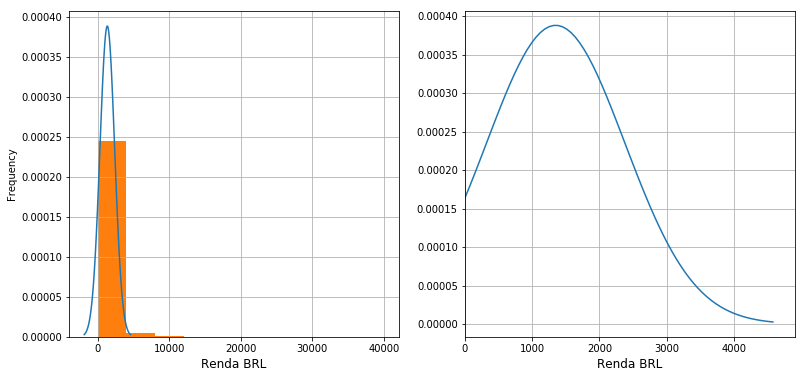

In [70]:
print(30*" ", "Histograma e distribuiçao normal da renda")
mu = PEA1['Rendimento mensal'].describe()[1]
sigma = PEA1['Rendimento mensal'].describe()[2]
variance = sigma**2
x = np.linspace(mu - math.pi*sigma, mu + math.pi*sigma, 100)
alpha = 0.05

plt.subplot(121)
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
PEA1['Rendimento mensal'].plot.hist(density=True, figsize=(13, 6))
plt.xlabel("Renda BRL", size = 12)
plt.grid()

plt.subplot(122)
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
plt.xlabel("Renda BRL", size = 12)
plt.grid()
plt.xlim(left=0)
plt.show()

A partir dos graficos acima podemos concluir que apesar de existirem valores fora da curva é razoável utilizar a média como uma representação do salário ganho pelos brasileiros entre 30 e 40 anos com fundamental completo ou médio incompleto que trabalham entre 40 e 44 horas por semana.

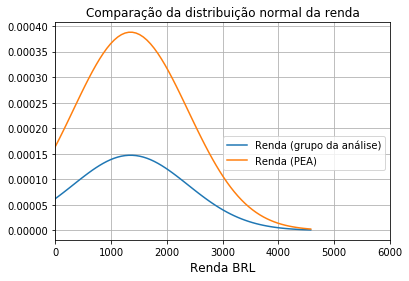

In [71]:
mut = PEA['Rendimento mensal'].describe()[1]
sigmat = PEA['Rendimento mensal'].describe()[2]
variancet = sigmat**2
xt = np.linspace(mut - math.pi*sigmat, mut + math.pi*sigmat, 100)


plt.plot(x,scipy.stats.norm.pdf(xt, mut, sigmat))
plt.plot(x,scipy.stats.norm.pdf(x, mu, sigma))
plt.xlabel("Renda BRL", size = 12)
plt.xlim(left=0)
plt.xlim(right=6000)
plt.legend(["Renda (grupo da análise)", "Renda (PEA)",], loc='best', bbox_to_anchor=(1,0.5))
plt.title("Comparação da distribuição normal da renda")
plt.grid()

# 2011

In [72]:
#Leitura dos dados de 2011
dados11 = pd.read_csv('PES2011.csv',sep=',')

#Filtrando variáveis
Dados_Filtrado11 = dados11.loc[(dados11.V0302)|(dados11.V8005)|(dados11.V4704)|(dados11.V4809)|(dados11.V4707)|(dados11.V4718)\
                        |(dados11.V4723)|(dados11.V4745) , ['V0302','V8005','V4704','V4809','V4707','V4718','V4723','V4745']]

#Trocando o nome das colunas
Dados_Filtrado11.rename(columns={'V0302':'Sexo','V8005':'Idade','V4704':'Condição de atividade',\
                               'V4809':'Atividade principal','V4707':'Horas habitualmente trabalhadas por semana',\
                             'V4718':'Rendimento mensal','V4723':'Tipo de família','V4745':'Nível de instrução' },inplace=True)

#Definindo as variáveis como categóricas
Dados_Filtrado11.Sexo = Dados_Filtrado11.Sexo.astype('category')
Dados_Filtrado11.Idade = Dados_Filtrado11.Idade.astype('float')
Dados_Filtrado11['Condição de atividade'] = Dados_Filtrado11['Condição de atividade'].astype('category')
Dados_Filtrado11['Atividade principal'] = Dados_Filtrado11['Atividade principal'].astype('category')
Dados_Filtrado11['Horas habitualmente trabalhadas por semana'] = Dados_Filtrado11['Horas habitualmente trabalhadas por semana']\
.astype('category')
Dados_Filtrado11['Tipo de família'] = Dados_Filtrado11['Tipo de família'].astype('category')
Dados_Filtrado11['Nível de instrução'] = Dados_Filtrado11['Nível de instrução'].astype('category')
Dados_Filtrado11['Rendimento mensal'] = Dados_Filtrado11['Rendimento mensal'].astype('float')


In [73]:
#Traduzindo os tipos pelas descrições
Dados_Filtrado11.Sexo.cat.categories = (['M','F'])
Dados_Filtrado11['Condição de atividade'].cat.categories = (['Economicamente ativas','Não economicamente ativas'])
Dados_Filtrado11['Atividade principal'].cat.categories = (['Agrícola','Outras atividades industriais','Indústria de transformação\
','Construção','Comércio e reparação','Alojamento e alimentação','Transporte, armazenagem e comunicação','Administração pública\
','Educação, saúde e serviços sociais','Serviços domésticos','Outros serviços coletivos, sociais e pessoais','Outras atividades\
','Atividades maldefinidas '])
Dados_Filtrado11['Horas habitualmente trabalhadas por semana'].cat.categories = (['Até 14 horas','15 a 39 horas','40 a 44 horas'\
,'45 a 48 horas','49 horas ou mais'])
Dados_Filtrado11['Tipo de família'].cat.categories = (['Casal sem filhos','Casal com todos os filhos menores de 14 anos',\
'Casal com todos os filhos de 14 anos ou mais','Casal com filhos menores de 14 anos e de 14 anos ou mais','Mãe com todos os \
filhos menores de 14 anos','Mãe com todos os filhos de 14 anos ou mais','Mãe com filhos menores de 14 anos e de 14 anos ou mais\
','Outros tipos de família'])
Dados_Filtrado11['Nível de instrução'].cat.categories = (['Sem instrução','Fundamental incompleto ou equivalente','Fundamental \
completo ou equivalente','Médio incompleto ou equivalente','Médio completo ou equivalente','Superior incompleto ou equivalente'\
,'Superior completo ','Não determinado'])

#Remove PEA que não declarou renda, pois para esses o valor computado é 999 999 999 999.
Dados_Filtrado11["Rendimento mensal"] = Dados_Filtrado11["Rendimento mensal"][(Dados_Filtrado11["Rendimento mensal"])<999999999999]

#Elimina os não economicamente ativos.
PEA11 = Dados_Filtrado11[Dados_Filtrado11['Condição de atividade'] =='Economicamente ativas']

#Como foi filtrada a condição de atividade a retiramos do DataFrame para evitar a poluição visual
PEA11 = PEA11.drop(columns = 'Condição de atividade')


In [74]:
PEA1_11 = PEA11[(PEA11.Idade <= 40) & (PEA11.Idade >= 30) & (PEA11['Horas habitualmente trabalhadas por semana'] == '40 a 44 horas') & \
((PEA11['Nível de instrução'] == 'Fundamental incompleto ou equivalente') | (PEA11['Nível de instrução'] == \
'Médio completo ou equivalente'))]


Renda 2011: 1028 reais
---------------------------------------------
Renda 2015: 1350 reais


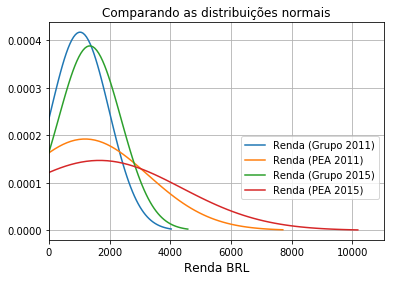

In [75]:
#Grupo Selecionado 2011
mean_0 = PEA1_11['Rendimento mensal'].mean()
std_0 = PEA1_11['Rendimento mensal'].std()
var_0 = std_0**2
x_0 = np.linspace(mean_0 - math.pi*std_0, mean_0 + math.pi*std_0, 100)

#Total 2011
mean_1 = PEA11['Rendimento mensal'].mean()
std_1 = PEA11['Rendimento mensal'].std()
var_1 =std_1**2
x_1 = np.linspace(mean_1 - math.pi*std_1, mean_1 + math.pi*std_1, 100)

#Grupo Selecionado 2015
mean_2 = PEA1['Rendimento mensal'].mean()
std_2 = PEA1['Rendimento mensal'].std()
var_2 = std_2**2
x_2 = np.linspace(mean_2 - math.pi*std_2, mean_2 + math.pi*std_2, 100)

#Total 2015
mean_3 = PEA['Rendimento mensal'].mean()
std_3 = PEA['Rendimento mensal'].std()
var_3 = std_3**2
x_3 = np.linspace(mean_3 - math.pi*std_3, mean_3 + math.pi*std_3, 100)

plt.plot(x_0,scipy.stats.norm.pdf(x_0, mean_0, std_0))
plt.plot(x_1,scipy.stats.norm.pdf(x_1, mean_1, std_1))
plt.plot(x_2,scipy.stats.norm.pdf(x_2, mean_2, std_2))
plt.plot(x_3,scipy.stats.norm.pdf(x_3, mean_3, std_3))
plt.xlabel("Renda BRL", size = 12)
plt.xlim(left=0)
#plt.xlim(right=6000)
plt.legend(["Renda (Grupo 2011)", "Renda (PEA 2011)","Renda (Grupo 2015)","Renda (PEA 2015)"], loc='best', bbox_to_anchor=(1,0.5))
plt.title("Comparando as distribuições normais")
plt.grid()

print('Renda 2011: ' + str(int(mean_0)) + ' reais')
print(45*'-')
print('Renda 2015: ' + str(int(mean_2)) + ' reais')



Ao comparar as curvas percebemos que de 2011 para 2015 a renda média teve um leve aumento e a distribuição passou a ser mais homogênia.

In [76]:
PEA1_11.insert(1, 'Ano Pesquisa', '2011')
PEA1.insert(1, 'Ano Pesquisa', '2015')

PEA_F = pd.concat([PEA1, PEA1_11])

ct0 = (pd.crosstab(PEA_F['Ano Pesquisa'],PEA_F['Atividade principal'],margins=True,rownames=['ANOS'],\
colnames=['ATIVIDADE PRINCIPAL'], normalize='index')*100)
ct0

ATIVIDADE PRINCIPAL,Agrícola,Outras atividades industriais,Indústria de transformação,Construção,Comércio e reparação,Alojamento e alimentação,"Transporte, armazenagem e comunicação",Administração pública,"Educação, saúde e serviços sociais",Serviços domésticos,"Outros serviços coletivos, sociais e pessoais",Outras atividades,Atividades maldefinidas
ANOS,,,,,,,,,,,,,
2011,7.030597,1.329209,17.463635,11.929443,19.520147,4.096305,6.370172,6.019060,7.289751,6.470490,3.377362,8.970072,0.133757
2015,7.950911,1.026404,15.745630,13.811826,20.825586,4.380811,6.582373,4.722945,7.928598,5.593157,3.265154,8.062477,0.104128
All,7.517613,1.168969,16.554493,12.925572,20.210965,4.246861,6.482465,5.333176,7.627819,6.006219,3.317983,8.489786,0.118078


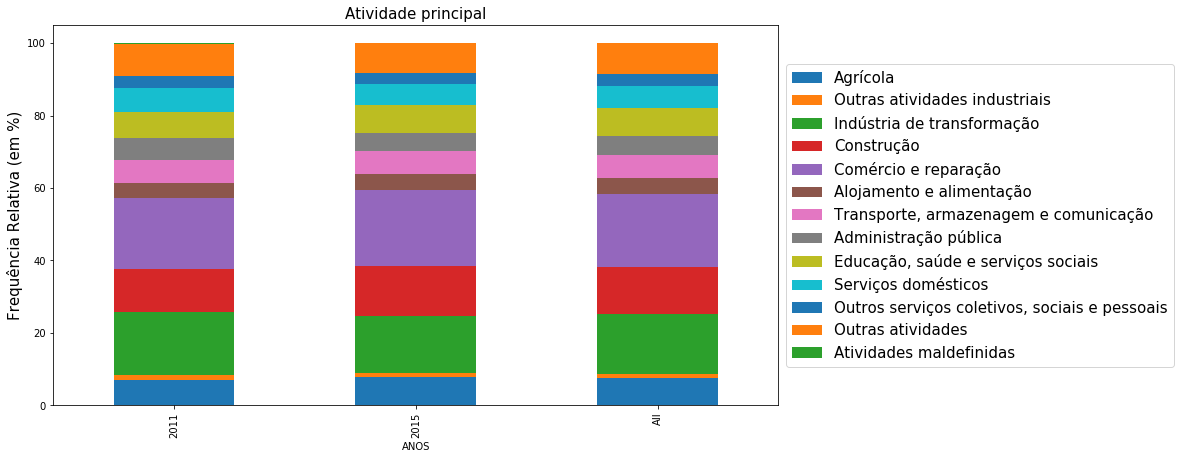

In [82]:
plot = ct0.plot(kind='bar', stacked=True,figsize=(13,7))
ax = plt.subplot(111)
ax.legend(loc='center left',fontsize = 15, bbox_to_anchor=(1,0.5));
plt.ylabel('Frequência Relativa (em %)',fontsize = 15)
plt.title('Atividade principal',fontsize = 15)
plt.show()

Observamos qua não houve grandes mudanças nas áreas de atividade principal nos anos estudados.

In [91]:
ct1 = (pd.crosstab(PEA_F['Ano Pesquisa'],PEA_F['Sexo'],margins=True,rownames=['ANOS'], colnames=['ATIVIDADE PRINCIPAL'], normalize='index')*100)
ct1

ct2 = (pd.crosstab(PEA_F['Ano Pesquisa'],PEA_F['Tipo de família'],margins=True,rownames=['ANOS'], colnames=['TIPO DE FAMILIA'], normalize='index')*100)
ct2

TIPO DE FAMILIA,Casal sem filhos,Casal com todos os filhos menores de 14 anos,Casal com todos os filhos de 14 anos ou mais,Casal com filhos menores de 14 anos e de 14 anos ou mais,Mãe com todos os filhos menores de 14 anos,Mãe com todos os filhos de 14 anos ou mais,Mãe com filhos menores de 14 anos e de 14 anos ou mais,Outros tipos de família
ANOS,,,,,,,,
2011,11.185420,39.082093,14.236750,13.977596,3.385721,8.117372,1.964554,8.050493
2015,12.168092,36.667906,14.585348,13.603570,3.175902,9.007066,1.985868,8.806248
All,11.705436,37.804542,14.421222,13.779667,3.274688,8.588184,1.975833,8.450427


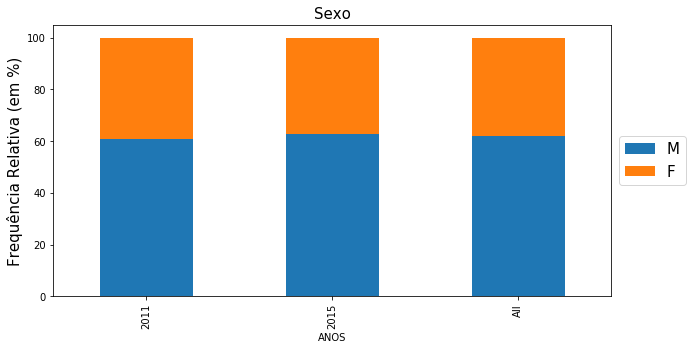

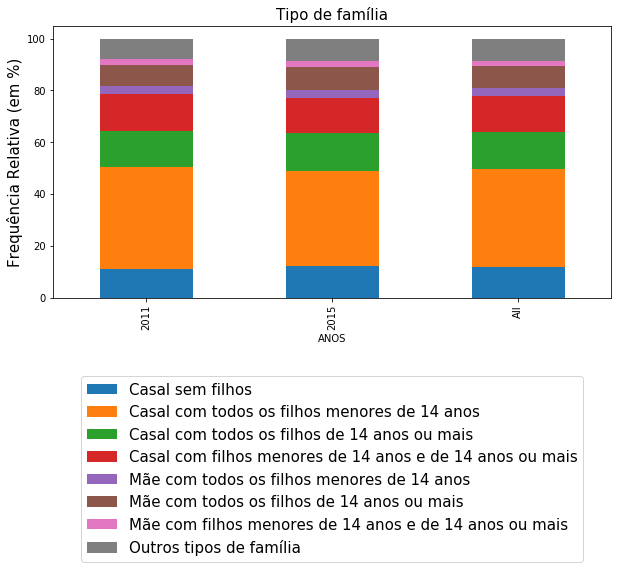

In [111]:
ct1.plot(kind='bar', stacked=True,figsize=(10,5))
plt.legend(loc='center left',fontsize = 15, bbox_to_anchor=(1,0.5));
plt.ylabel('Frequência Relativa (em %)',fontsize = 15)
plt.title('Sexo', fontsize=15)

ct2.plot(kind='bar', stacked=True,figsize=(10,5))
plt.legend(loc='lower center',fontsize = 15, bbox_to_anchor=(0.5,-1));
plt.ylabel('Frequência Relativa (em %)',fontsize = 15)
plt.title('Tipo de família', fontsize=15)

plt.show()

Como observado no gráfico de Atividade Principal não houve grandes mudanças nas frequências relativas dos anos de 2011 a 2015 para Sexo e Tipo de Família.

___
## Conclusão 

Assim podemos concluir que em 2015 o perfil da PEA é da seguinte forma:

    -Entre 30 e 40 anos
    -Médio completo ou Fundamental incompleto
    -Trabalha entre 40 e 44 horas por semana
    -Casado com todos os filhos menores de 14 anos
    -Comércio e reparação
    -Ganha em média 1300 reais
    -Homem

Concluímos que não houveram grandes mudanças de 2011 para 2015, com exceção de um leve aumento na renda média e uma melhor distribuição da mesma.